In [170]:
import pandas as pd
import numpy as np
from numpy import arange
from scipy.stats import percentileofscore
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('wnba.csv',encoding='latin1')
df.shape

(143, 32)

In [5]:
df

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0


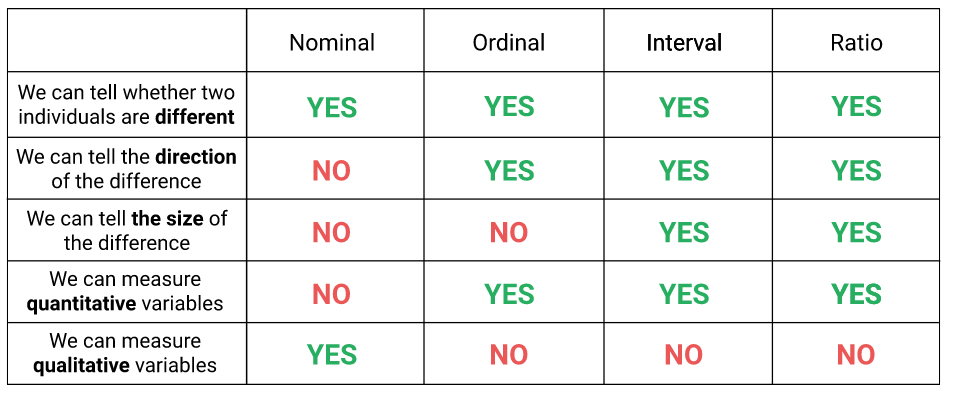

In [7]:
freq_distro_pos = df.loc[:,'Pos'].value_counts()
freq_distro_pos

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

In [8]:
freq_distro_height = df.loc[:,'Height'].value_counts()
freq_distro_height

188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64

In [17]:
freq_distro_height.sort_index()

165     1
168     2
170     6
173    11
175    16
178     8
180     7
183    11
185    15
188    20
191    11
193    18
196     9
198     5
201     2
206     1
Name: Height, dtype: int64

In [19]:
age_ascending = df['Age'].value_counts().sort_index()
age_ascending

21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: Age, dtype: int64

In [20]:
age_descending = df['Age'].value_counts().sort_index(ascending = False)
age_descending 

36     1
35     4
34     5
33     3
32     8
31     8
30     9
29     8
28    14
27    13
26    12
25    15
24    16
23    15
22    10
21     2
Name: Age, dtype: int64

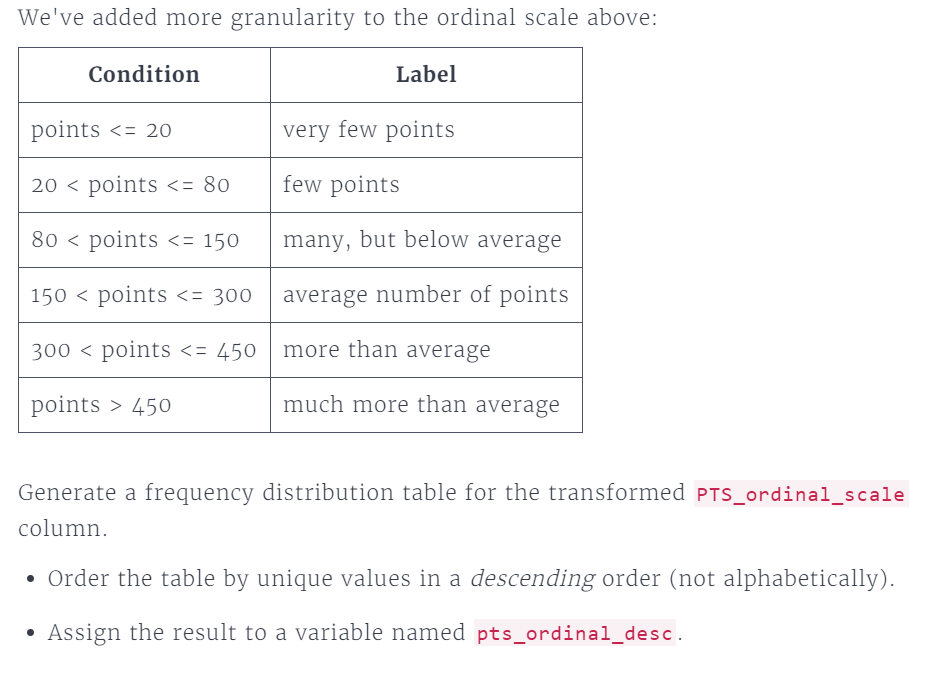


In [28]:
wnba = df[['Name','PTS']].copy()
wnba['PTS_ordinal_scale'] = np.nan
wnba.head()

def pts_category(pts):
    if pts <= 20:
        pts_ordinal_scale = 'very few points'
    elif (20 < pts <=80):
        pts_ordinal_scale = 'few points'
    elif (80 < pts <=150):
        pts_ordinal_scale = 'many, but below average'
    elif (150 < pts<=300):
        pts_ordinal_scale = 'average number of points'
    elif (300 < pts <=450):
        pts_ordinal_scale = 'more than average'
    elif pts >450:
        pts_ordinal_scale = 'much more than average'
    else:
        pts_ordinal_scale = np.nan
        
    return pts_ordinal_scale

wnba['PTS_ordinal_scale'] = wnba['PTS'].apply(pts_category)
wnba

,Name,PTS,PTS_ordinal_scale
0,Aerial Powers,93,"many, but below average"
1,Alana Beard,217,average number of points
2,Alex Bentley,218,average number of points
3,Alex Montgomery,188,average number of points
4,Alexis Jones,50,few points
...,...,...,...
138,Tiffany Hayes,467,much more than average
139,Tiffany Jackson,28,few points
140,Tiffany Mitchell,277,average number of points
141,Tina Charles,582,much more than average


In [32]:
pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts().iloc[[5,1,2,0,3,4]]
pts_ordinal_desc

very few points             12
few points                  27
many, but below average     25
average number of points    45
more than average           21
much more than average      13
Name: PTS_ordinal_scale, dtype: int64

In [36]:
wnba = df[['Name','Age']].copy()
proportion_25 = len(wnba.loc[wnba['Age'] == 25,:])/len(wnba)
percentage_30 = len(wnba.loc[wnba['Age'] == 30,:])/len(wnba)
percentage_over_30 = len(wnba.loc[wnba['Age'] >= 30,:])/len(wnba)
percentage_below_23 = len(wnba.loc[wnba['Age'] <= 23,:])/len(wnba)

In [48]:
percentage = wnba['Age'].value_counts(normalize = True).sort_index()

proportion_25_ = percentage[25]
percentage_30_ = percentage[30]*100
percentage_over_30_ = percentage.loc[30:].sum()
percentage_below_23_ = percentage.loc[:23].sum()


print(proportion_25_)
print(percentage_30_)
print(percentage_over_30_)
print(percentage_below_23_)

0.1048951048951049
6.293706293706294
0.26573426573426573
0.1888111888111888


In [52]:
percentage_below_23_percentile = percentileofscore(a = wnba['Age'], score=23 , kind = 'weak' )
percentage_below_23_percentile

18.88111888111888

In [54]:

percentile_rank_half_less = percentileofscore(a=df['Games Played'],score=17,kind='weak')
percentile_rank_half_less

16.083916083916083

In [55]:
percentage_half_more = 100-percentileofscore(a=df['Games Played'],score=17,kind='weak')
percentage_half_more 

83.91608391608392

In [57]:
df['Age'].describe()

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64

In [58]:
age_upper_quartile = df['Age'].describe().iloc[6]
age_upper_quartile

30.0

In [59]:
age_middle_quartile = df['Age'].describe().iloc[5]
age_middle_quartile

27.0

In [64]:
age_95th_percentile = df['Age'].describe(percentiles = [.95]).iloc[5]
age_95th_percentile

34.0

In [72]:
grouped_freq_table = df['PTS'].value_counts(bins=10,normalize=True).sort_index(ascending=False) *100
grouped_freq_table

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64

In [83]:
df['MIN'].value_counts(bins=40,normalize=True).sort_index(ascending=False) *100

(992.85, 1018.0]    1.398601
(967.7, 992.85]     0.000000
(942.55, 967.7]     2.797203
(917.4, 942.55]     2.097902
(892.25, 917.4]     2.797203
(867.1, 892.25]     2.097902
(841.95, 867.1]     4.195804
(816.8, 841.95]     4.195804
(791.65, 816.8]     2.097902
(766.5, 791.65]     0.699301
(741.35, 766.5]     3.496503
(716.2, 741.35]     3.496503
(691.05, 716.2]     2.097902
(665.9, 691.05]     3.496503
(640.75, 665.9]     2.097902
(615.6, 640.75]     2.797203
(590.45, 615.6]     3.496503
(565.3, 590.45]     2.097902
(540.15, 565.3]     0.699301
(515.0, 540.15]     2.097902
(489.85, 515.0]     2.797203
(464.7, 489.85]     2.097902
(439.55, 464.7]     3.496503
(414.4, 439.55]     0.699301
(389.25, 414.4]     2.097902
(364.1, 389.25]     4.195804
(338.95, 364.1]     2.797203
(313.8, 338.95]     1.398601
(288.65, 313.8]     1.398601
(263.5, 288.65]     2.797203
(238.35, 263.5]     2.797203
(213.2, 238.35]     4.895105
(188.05, 213.2]     2.097902
(162.9, 188.05]     0.699301
(137.75, 162.9

In [117]:
intervals = pd.interval_range(start=0,end=600,freq=60)
intervals

IntervalIndex([(0, 60], (60, 120], (120, 180], (180, 240], (240, 300], (300, 360], (360, 420], (420, 480], (480, 540], (540, 600]],
              closed='right',
              dtype='interval[int64]')

In [118]:
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0,0,0],index = intervals)
gr_freq_table

(0, 60]       0
(60, 120]     0
(120, 180]    0
(180, 240]    0
(240, 300]    0
(300, 360]    0
(360, 420]    0
(420, 480]    0
(480, 540]    0
(540, 600]    0
dtype: int64

In [119]:
for i in df['PTS']:
    for interval in intervals:
        if i in interval:
            gr_freq_table.loc[interval] += 1
            break

gr_freq_table
            

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64

In [120]:
gr_freq_table.sum()

143

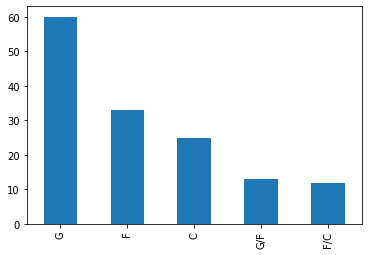

In [127]:
df['Pos'].value_counts().plot.bar()

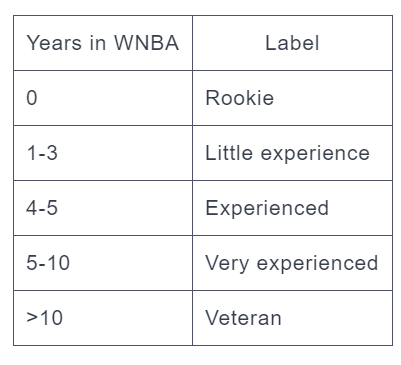

In [145]:
def exp_cat(exp):
    if exp == '1' or exp =='R':
        title = 'Rookie'
    elif exp =='2'or exp=='3' :
        title = 'Little experience'
    elif exp =='4'or exp=='5' :
        title = 'Experienced'
    elif exp =='6'or exp=='7' or exp =='8'or exp=='9' or exp=='10':
        title = 'Very experienced'
    else:
        title = 'Veteran'
    return title



df['Exp_ordinal'] = df['Experience'].apply(exp_cat)
# df.loc[df['Experience']=='R','Exp_ordinal'] = 'Rookie'

df[['Experience','Exp_ordinal']]

,Experience,Exp_ordinal
0,2,Little experience
1,12,Veteran
2,4,Experienced
3,6,Very experienced
4,R,Rookie
...,...,...
138,6,Very experienced
139,9,Very experienced
140,2,Little experience
141,8,Very experienced


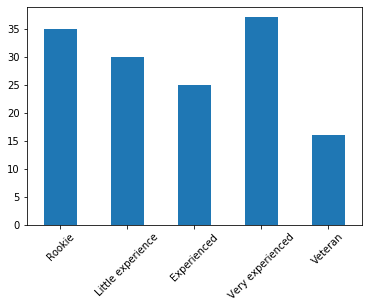

In [158]:
df['Exp_ordinal'].value_counts().iloc[[1,2,3,0,4]].plot.bar(rot=45)

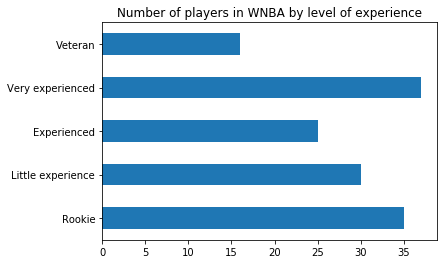

In [159]:
df['Exp_ordinal'].value_counts().iloc[[1,2,3,0,4]].plot.barh(title = 'Number of players in WNBA by level of experience')

Text(0, 0.5, 'Exp_ordinal')

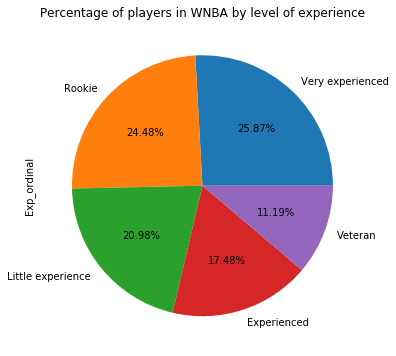

In [164]:
df['Exp_ordinal'].value_counts().plot.pie(figsize=(6,6),autopct = '%.2f%%',title='Percentage of players in WNBA by level of experience')
plt.ylabel('Exp_ordinal')

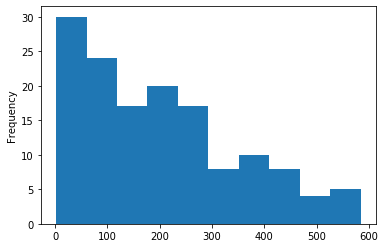

In [165]:
df['PTS'].plot.hist()

In [167]:
df['Games Played'].describe()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

Text(0.5, 0, 'Games Played')

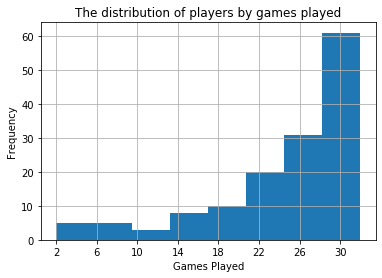

In [177]:
df['Games Played'].plot.hist(grid=True,xticks = arange(2,32,4),bins=8,title = 'The distribution of players by games played')
plt.xlabel('Games Played')

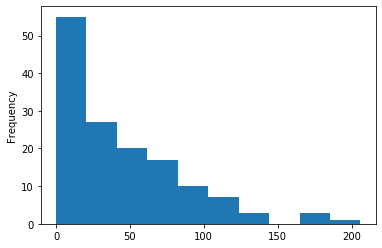

In [179]:
df['AST'].plot.hist()
assists_distro = 'right skewed'

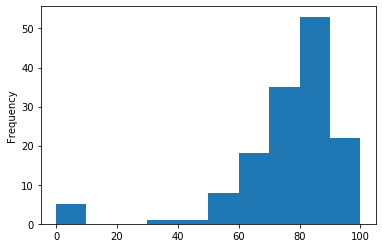

In [180]:
df['FT%'].plot.hist()
ft_percent_distro = 'left skewed'

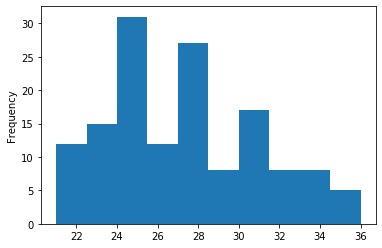

In [181]:
df['Age'].plot.hist()

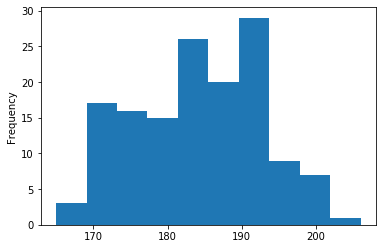

In [183]:
df['Height'].plot.hist()
normal_distribution = 'Height'

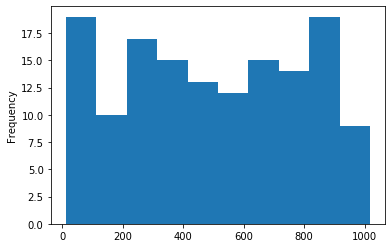

In [184]:
df['MIN'].plot.hist()